## Load Grid Mazes From Images

In [1]:
%load_ext autoreload
%autoreload 2
from mpb import MPB, MultipleMPB
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt

In [2]:
mpb = MPB()

Any configuration values (or subtrees) can be set and retrieved using the bracket operator on the `MPB` instance. The key is a string and by using the dot-notation, a path can be given:

In [3]:
mpb["ompl.seed"] = 4  # set the seed of the OMPL planners

Some helper functions are available to set environment properties, and configure the planners, steer functions and post smoothers:

In [4]:
mpb.set_image_grid_env("image_mazes/intel-lab.png",
                       desired_width=300 * 0.5,
                       desired_height=300 * 0.5,
                       occupancy_threshold=0.98)
# mpb.set_corridor_grid_env()
mpb.set_planners(['rrt', 'informed_rrt_star'])
mpb.set_steer_functions(['reeds_shepp'])
mpb.set_start(50 * 0.5, 230 * 0.5, 0)
mpb.set_goal(235 * 0.5, 40 * 0.5, 0)

Run the motion planning benchmark:

In [5]:
mpb.run(id='test_run_intel', runs=1)  # optional run ID, number of runs (environments)

Running MPB with ID test_run_intel (log file at test_run_intel.log)...


0

In [6]:
mpb.print_info()

+++++++++++++++++++++++++ Run #0 (1 / 1) +++++++++++++++++++++++++
+ Steering:        Reeds-Shepp 
+ Environment:     grid
+ Planners:        RRT, InformedRRTstar
+ Found solution:  2 / 2
+ Exact solution:  2 / 2
+ Found colliding: 0 / 2
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



Visualize the planner trajectories:

Visualizing test_run_intel_results.json


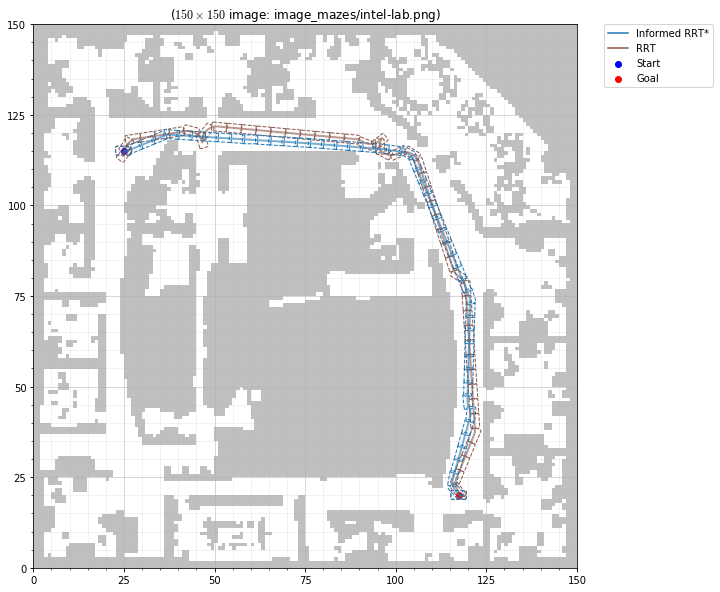

In [7]:
mpb.visualize_trajectories(fig_width=10, fig_height=10)


Visualizing test_run_intel_results.json...


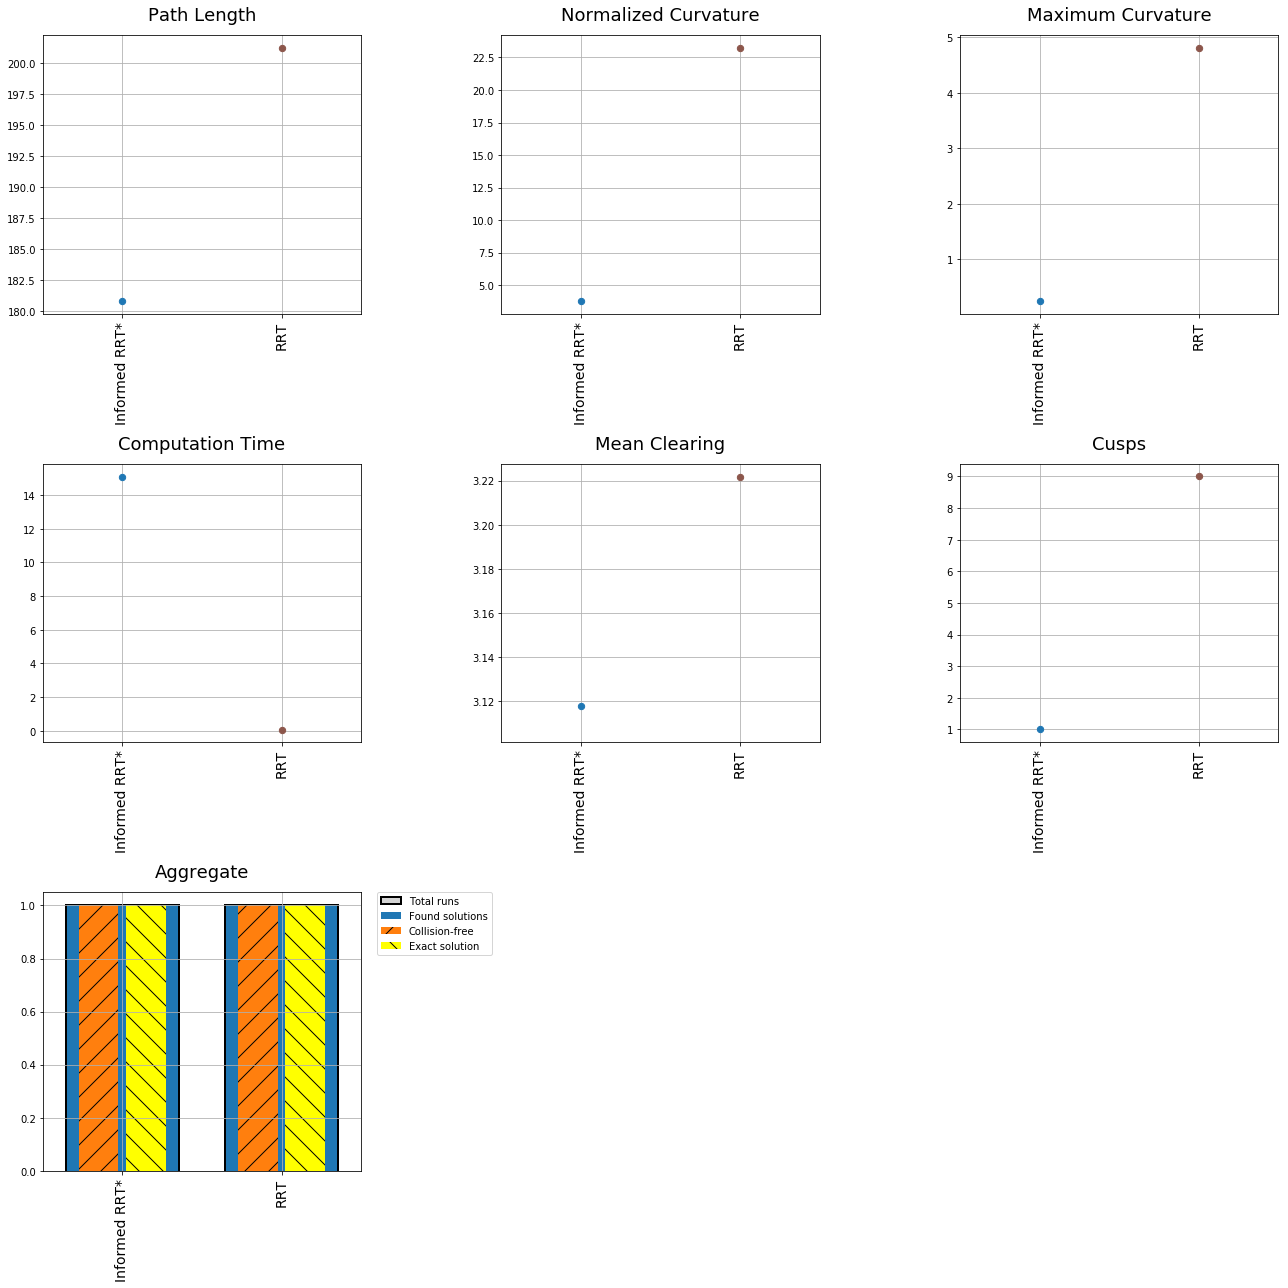

In [8]:
mpb.plot_planner_stats(plot_violins=False)

# Freiburg Map

In [4]:
mpb.set_image_grid_env("image_mazes/freiburg.png",
                       desired_width=911 * 0.5,
                       desired_height=368 * 0.5,
                       occupancy_threshold=0.98)

mpb.set_planners(['rrt', 'informed_rrt_star'])
mpb.set_steer_functions(['reeds_shepp'])

mpb.set_start(185 * 0.5, 220 * 0.5, 0)
mpb.set_goal(746 * 0.5, 280 * 0.5, 0)

In [5]:
mpb.run(id='test_run_freiburg', runs=1)  # optional run ID, number of runs (environments)

Running MPB with ID test_run_freiburg (log file at test_run_freiburg.log)...


0

In [6]:
mpb.print_info()

+++++++++++++++++++++++++ Run #0 (1 / 1) +++++++++++++++++++++++++
+ Steering:        Reeds-Shepp 
+ Environment:     grid
+ Planners:        InformedRRTstar, RRT
+ Found solution:  2 / 2
+ Exact solution:  0 / 2
+ Found colliding: 0 / 2
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++



Visualizing test_run_freiburg_results.json


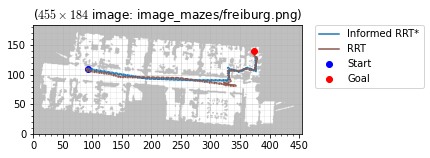

In [8]:
mpb.visualize_trajectories(fig_width=5, fig_height=2)

Visualizing test_run_freiburg_results.json...


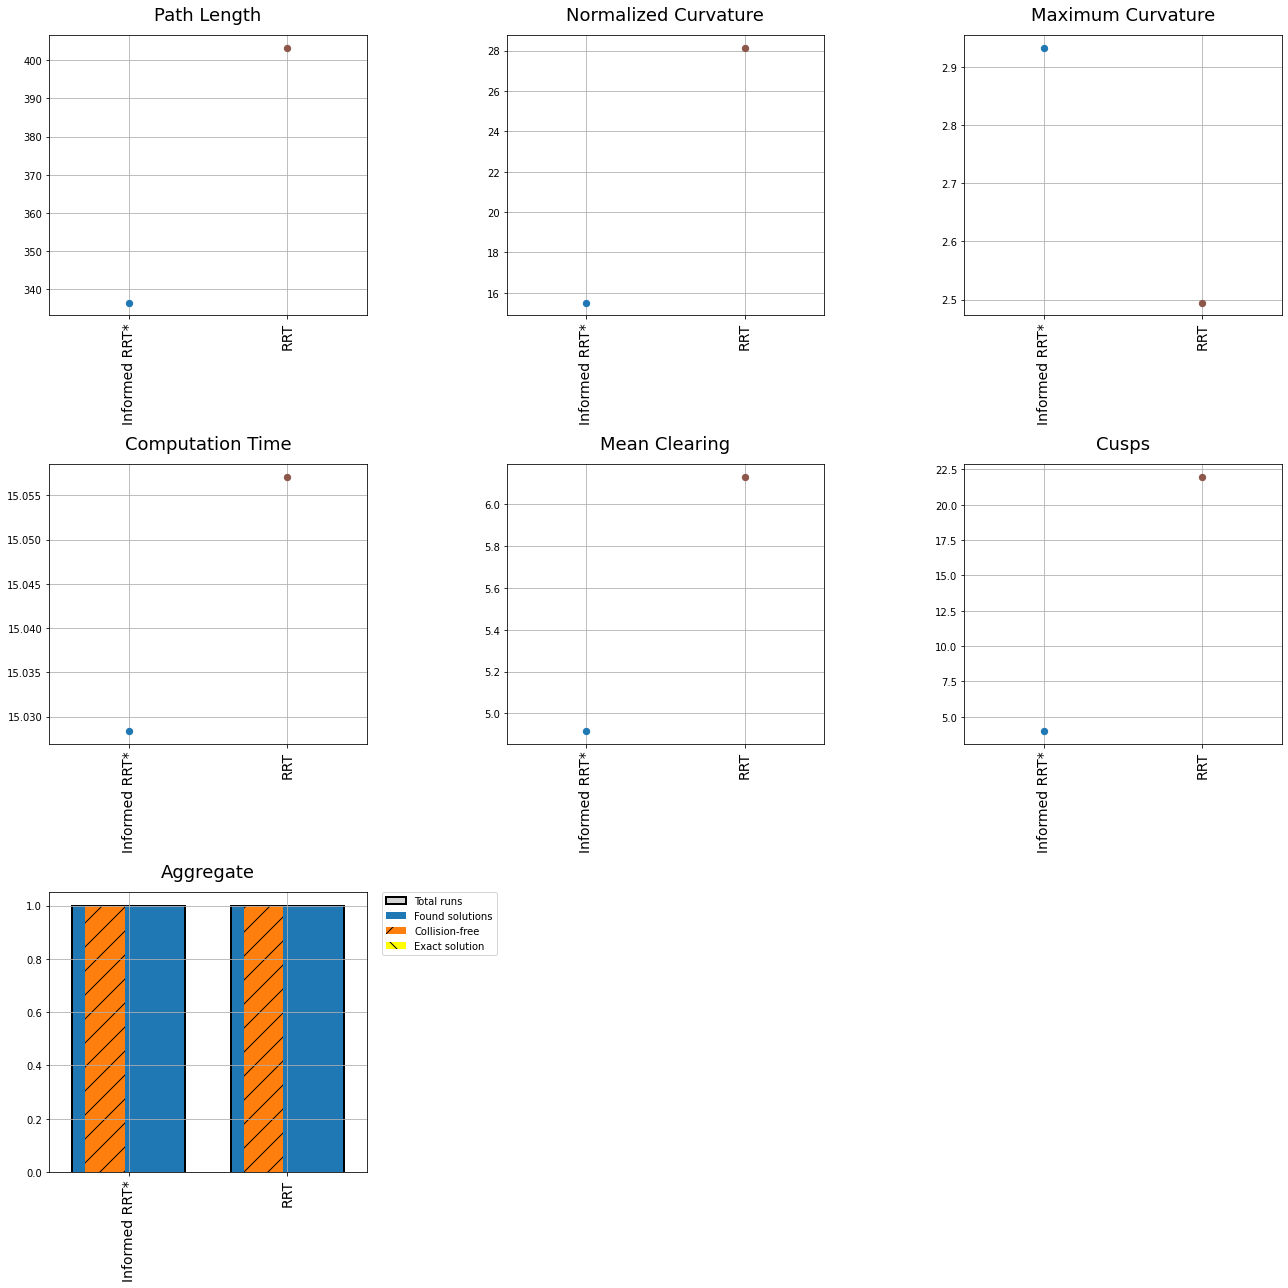

In [9]:
mpb.plot_planner_stats(plot_violins=False)